가짜 뉴스 데이터셋

In [1]:
## Read the data into a dataframe
import json
import pandas as pd
import numpy as np
import re
import string
import nltk
from num2words import num2words

df = pd.read_csv('C:/Users/user/Desktop/bilm-tf-master/textdataset/WELFake/WELFake_Dataset.csv')

In [2]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [3]:
df.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [4]:
df = df.dropna()
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16728\1186154468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 0'],inplace=True)


In [6]:
df

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [7]:
df.drop_duplicates(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_16728\3006716147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


In [8]:
df

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
...,...,...,...
72127,WIKILEAKS EMAIL SHOWS CLINTON FOUNDATION FUNDS...,An email released by WikiLeaks on Sunday appea...,1
72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0


<AxesSubplot:>

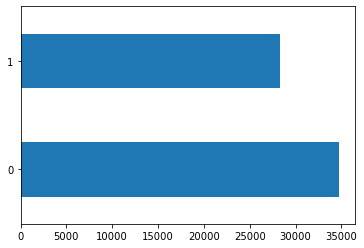

In [9]:
# 0 - Fake, 1 - Real
df['label'].value_counts().plot.barh()

In [10]:
X = df.drop(columns=['label'])
y = df['label']

In [13]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

X[['title','text']] = X[['title','text']].applymap(lambda x:remove_punctuation(x))
X[['title','text']] = X[['title','text']].applymap(lambda x:x.lower())

In [17]:
def clean_text(text):
    text=str(text).lower() #Converts text to lowercase
    text=re.sub('\d+', '', text) #removes numbers
    text=re.sub('\[.*?\]', '', text) #removes HTML tags
    text=re.sub('https?://\S+|www\.\S+', '', text) #removes url
    text=re.sub(r"["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", "", text) #removes emojis
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text) #removes punctuations
    #text = re.sub('\n', '', text)
    #text = re.sub('\w*\d\w*', '', text)
    return text

In [14]:
X=X['title']+' '+X['text']

In [18]:
X = X.apply(clean_text)

In [19]:
pattern = '[^a-z ]'
Clean_X=[]
for sen in X:
    Clean_X.append(re.sub(pattern, '', str(sen)))

In [25]:
print(len(Clean_X))
print(len(y))

63121
63121


In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Clean_X, y, test_size=0.2, random_state=42)

In [31]:
to_txt_filter=list(x_train)+list(x_test)
y=y_train+y_test

In [32]:
to_txt_filter

['raccoons in central park draw crowds and warnings to stay away  the new york times like a little crew of   bandits the first few raccoon faces poked out of the underbrush on a recent evening in central park their masked button eyes glowing with each flash of a smartphone camera undaunted several of the animals scuttled onto the walkway toward the picture takers they were followed by more raccoons  —   and then still more all told  raccoons clustered on a path near the southeastern edge of the park where it meets th street in manhattan they strolled around while a gaggle of onlookers tried to pose for selfies with them some people fed the animals soft pretzels from a pushcart by hand as the raccoons stood on their hind legs to wrest morsels from their admirers’ fingertips “is this normal” karen newis  a visitor from greensboro n c asked her sister stefanie price who lives in manhattan as they passed the raccoons one of the animals gingerly tiptoed toward a baby in a stroller sniffing 